<a href="https://colab.research.google.com/github/mohammadmasqala/Car-Insurance-Claim-Prediction-and-Customer-Behavior-Analysis/blob/main/Car_Insurance_Claim_Prediction_and_Customer_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preliminary Steps

### Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
!pip install keras-tuner --quiet
from keras_tuner import HyperParameters as hp
import keras_tuner as kt

# Sci-kit learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

### Load and Clean the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data from your path
df = pd.read_csv("/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Project/Car_Insurance_Claim.csv")
df=df.set_index('ID')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 569520 to 442696
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
df.nunique()

,0
AGE,4
GENDER,2
RACE,2
DRIVING_EXPERIENCE,4
EDUCATION,3
INCOME,4
CREDIT_SCORE,9018
VEHICLE_OWNERSHIP,2
VEHICLE_YEAR,2
MARRIED,2


In [ ]:
df.isna().sum()[df.isna().sum() > 0]

,0
CREDIT_SCORE,982
ANNUAL_MILEAGE,957


In [ ]:
# Saving list of column names for object cols
obj_cols = df.select_dtypes('object').columns
# Obtain the value counts for all string columns
for col in obj_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for AGE
AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64


Value Counts for GENDER
GENDER
female    5010
male      4990
Name: count, dtype: int64


Value Counts for RACE
RACE
majority    9012
minority     988
Name: count, dtype: int64


Value Counts for DRIVING_EXPERIENCE
DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64


Value Counts for EDUCATION
EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64


Value Counts for INCOME
INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64


Value Counts for VEHICLE_YEAR
VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: count, dtype: int64


Value Counts for VEHICLE_TYPE
VEHICLE_TYPE
sedan         9523
sports car     477
Name: count, dtype: int64




## Exploratory Visualizations

<Axes: >

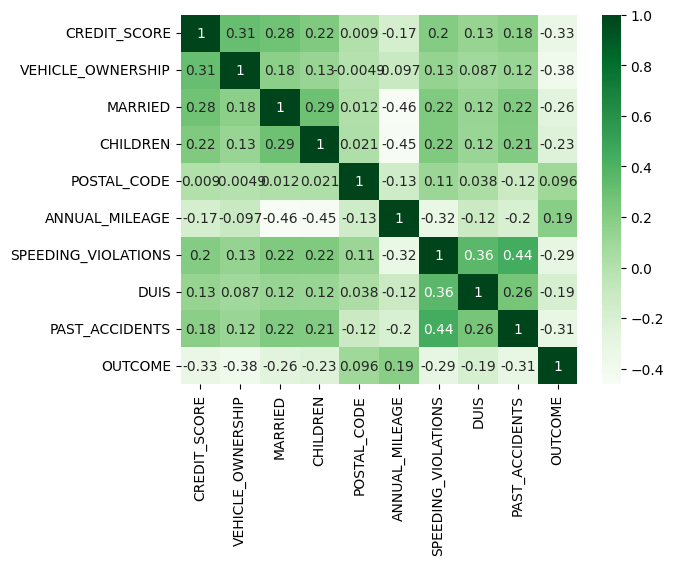

In [ ]:
# Get correlations
corr = df.corr(numeric_only = True)
# Include annotations on the heatmap
sns.heatmap(corr, cmap = 'Greens', annot = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 569520 to 442696
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null

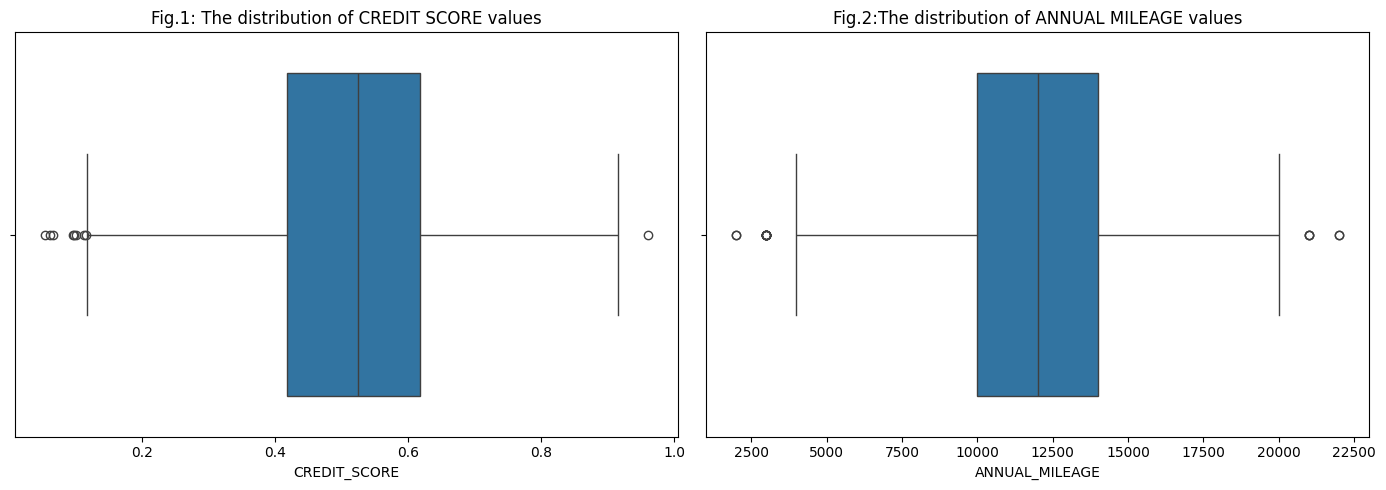

In [ ]:
fig, axes = plt.subplots(ncols=2 , figsize=(14,5))

# # The distribution of CREDIT SCORE values
sns.boxplot(data=df, x='CREDIT_SCORE',ax=axes[0])
axes[0].set_title('Fig.1: The distribution of CREDIT SCORE values', fontsize = 12)

# # The distribution of ANNUAL MILEAGE values
sns.boxplot(data=df,  x='ANNUAL_MILEAGE',ax=axes[1])
axes[1].set_title('Fig.2:The distribution of ANNUAL MILEAGE values', fontsize = 12)

fig.tight_layout()

In [ ]:
mean_CREDIT_SCORE=df['CREDIT_SCORE'].mean()
median_CREDIT_SCORE=df['CREDIT_SCORE'].median()
mean_ANNUAL_MILEAGE=df['ANNUAL_MILEAGE'].mean()
median_ANNUAL_MILEAGE=df['ANNUAL_MILEAGE'].median()
print(f'mean_CREDIT_SCORE={round(mean_CREDIT_SCORE,2)}\nmedian_CREDIT_SCORE={round(median_CREDIT_SCORE,2)}\nmean_ANNUAL_MILEAGE={round(mean_ANNUAL_MILEAGE,2)}\nmedian_ANNUAL_MILEAGE={round(median_ANNUAL_MILEAGE,2)}')


mean_CREDIT_SCORE=0.52
median_CREDIT_SCORE=0.53
mean_ANNUAL_MILEAGE=11697.0
median_ANNUAL_MILEAGE=12000.0


Since there are outliers and the mean does not equal the median, null values will be imputed with median

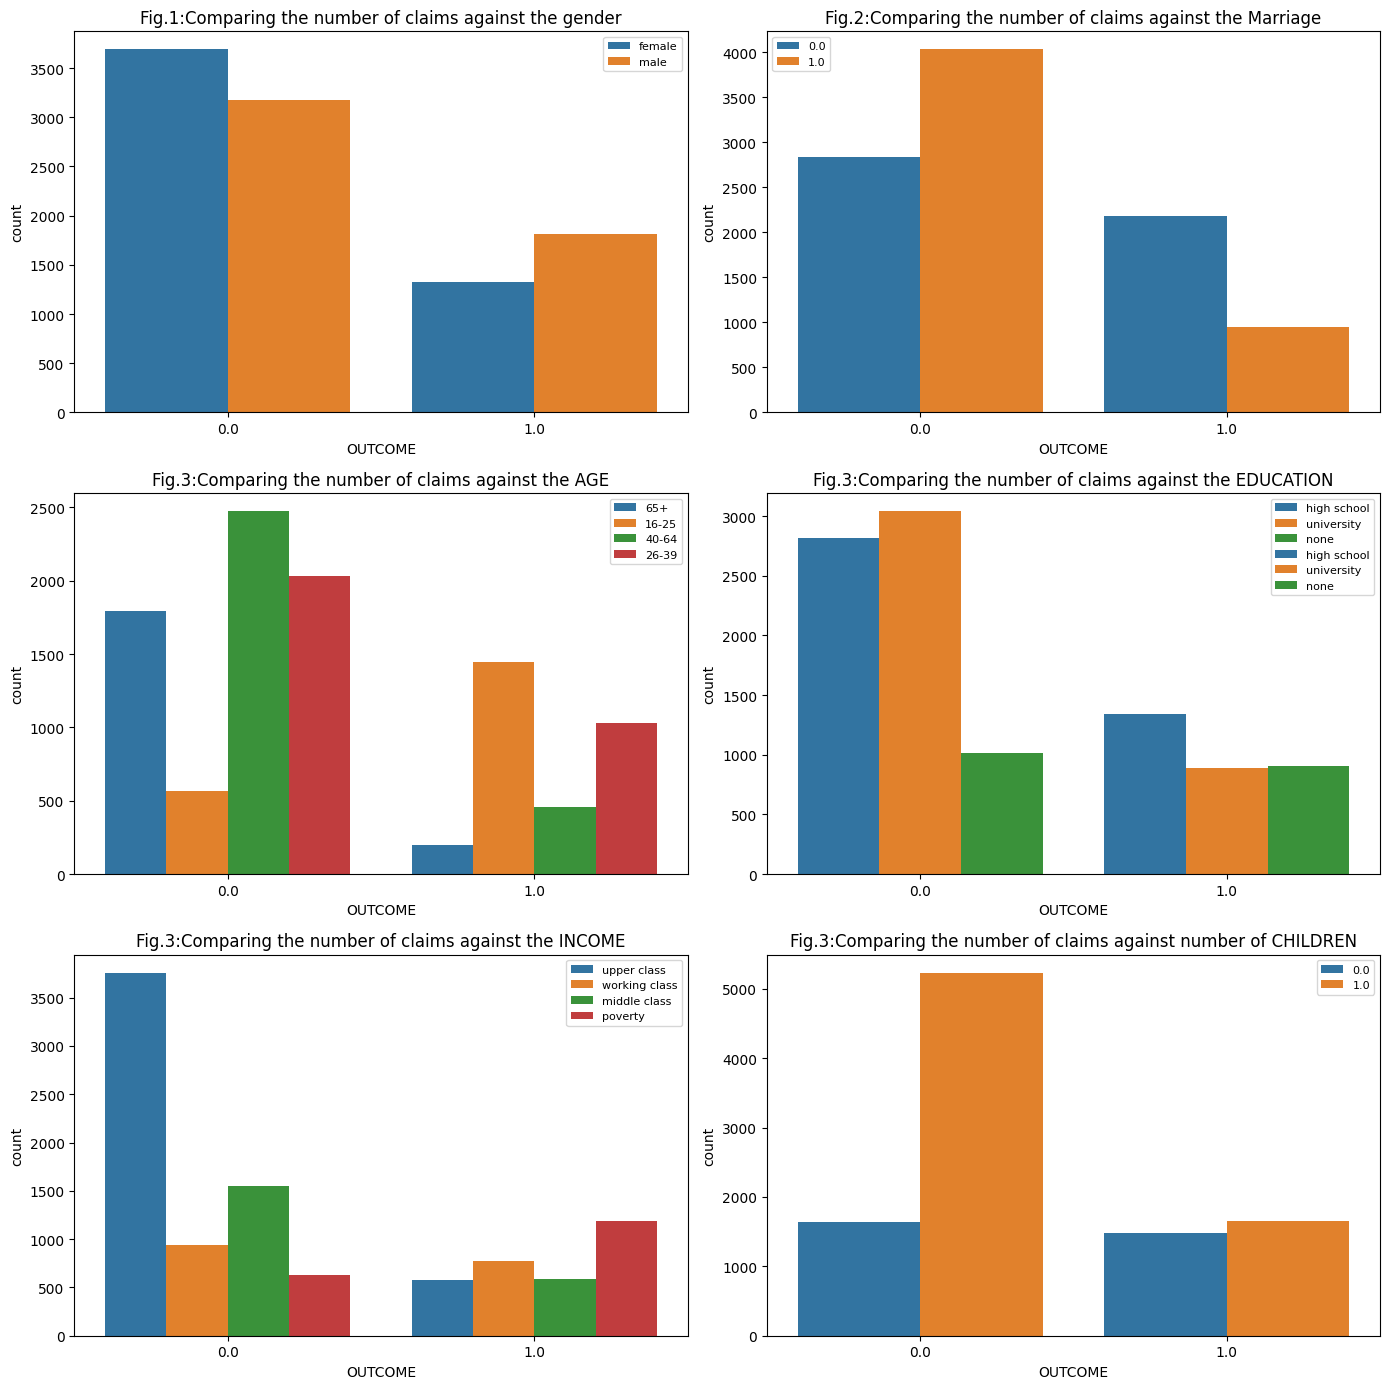

In [ ]:
fig, axes = plt.subplots(ncols=2 , nrows=3, figsize=(14,14))

# # Comparing the number of claims against the gender
sns.countplot(data=df, x='OUTCOME', hue='GENDER',ax=axes[0,0])
axes[0,0].legend(fontsize="8", loc='upper right')
axes[0,0].set_title('Fig.1:Comparing the number of claims against the gender', fontsize = 12)

# # Comparing the number of claims against Marriage
sns.countplot(data=df,  x='OUTCOME', hue='MARRIED',ax=axes[0,1])
axes[0,1].legend(fontsize="8", loc='upper left')
axes[0,1].set_title('Fig.2:Comparing the number of claims against the Marriage', fontsize = 12)

# # Comparing the number of claims against the AGE
sns.countplot(data=df, x='OUTCOME', hue='AGE',ax=axes[1,0])
axes[1,0].legend(fontsize="8", loc='upper right')
axes[1,0].set_title('Fig.3:Comparing the number of claims against the AGE', fontsize = 12)

# # Comparing the number of claims against the EDUCATION
sns.countplot(data=df, x='OUTCOME', hue='EDUCATION',ax=axes[1,1])
axes[1,1].legend(fontsize="8", loc='upper right')
axes[1,1].set_title('Fig.3:Comparing the number of claims against the EDUCATION', fontsize = 12)

# # Comparing the number of claims against the EDUCATION
sns.countplot(data=df, x='OUTCOME', hue='EDUCATION',ax=axes[1,1])
axes[1,1].legend(fontsize="8", loc='upper right')
axes[1,1].set_title('Fig.3:Comparing the number of claims against the EDUCATION', fontsize = 12)

# # Comparing the number of claims against the INCOME
sns.countplot(data=df, x='OUTCOME', hue='INCOME',ax=axes[2,0])
axes[2,0].legend(fontsize="8", loc='upper right')
axes[2,0].set_title('Fig.3:Comparing the number of claims against the INCOME', fontsize = 12)

# # Comparing the number of claims against number of CHILDREN
sns.countplot(data=df, x='OUTCOME', hue='CHILDREN',ax=axes[2,1])
axes[2,1].legend(fontsize="8", loc='upper right')
axes[2,1].set_title('Fig.3:Comparing the number of claims against number of CHILDREN', fontsize = 12)


fig.tight_layout()


**Fig.1: Gender vs Claim**


* Males have a significantly higher number of claims than females.

* Females also file claims but at a lower proportion compared to their total representation.

* Male drivers are more likely to file claims than female drivers.


**Fig.2: Marriage vs Claim**


* Individuals who are married show a lower proportion of claims.

* Unmarried individuals make up the majority of claims.

* Being married may correlate with safer driving behavior or lower risk.


**Fig.3: Age vs Claim**


* The 26–39 age group has the highest number of claims.

* Younger (16–25) and mid-age (40–64) groups also contribute to claims.

* The 65+ group has the lowest number of claims.

* Young and middle-aged drivers are more likely to file claims than seniors.

**Fig.4: Education vs Claim**


* Those with university and high school education levels dominate the claims.

* Individuals with no formal education show fewer claims overall.

* Education level may not strongly influence claims, though the majority of claimants are still from more educated groups — likely reflecting population distribution.


**Fig.5: Income vs Claim**


* Middle class and poverty-level individuals account for the most claims.

* Upper class and working class drivers make fewer claims.

* Claim frequency appears to increase with financial pressure, possibly due to more frequent or riskier driving among lower-income groups.


**Fig.6: Children vs Claim**


* Individuals with children make up the majority of the dataset and also account for most claims.

* Individuals without children still claim, but in smaller numbers.

* Having children doesn’t strongly reduce claim risk — might correlate with more driving.



## Preprocess data

In [ ]:
# Define features and target
X = df.drop(columns = ['OUTCOME'])
y = df['OUTCOME']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42 )

In [ ]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ( 'numeric',num_pipe, num_cols)
num_tuple

Numeric Columns: Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
        'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
        'PAST_ACCIDENTS'],
       dtype='object'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 569520 to 442696
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null

In [ ]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
# This should be a list, even if it's a list of one element
ord_cols = ['AGE','DRIVING_EXPERIENCE','EDUCATION','INCOME']
print("Ordinal Columns:", ord_cols)

## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Columms
AGE_order = ['16-25','26-39','40-64','65+']
DRIVING_EXPERIENCE_order=['0-9y','10-19y','20-29y','30y+']
EDUCATION_order=['none','high school','university']
INCOME_order=['poverty','working class','middle class','upper class']
# Making the list of order lists for OrdinalEncoder
# This should be a list of lists, with one list for each ordinal column
ordinal_category_orders = [AGE_order,DRIVING_EXPERIENCE_order,EDUCATION_order,INCOME_order]

ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(ord_encoder, scaler_ord)
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)

Ordinal Columns: ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME']


In [ ]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_tuple = ('categorical', ohe_encoder, ohe_cols)

OneHotEncoder Columns: Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object')


In [ ]:
# Instantiate with verbose_feature_names_out=False
preprocessor = ColumnTransformer([num_tuple,ord_tuple ,ohe_tuple],verbose_feature_names_out=False)
# Fit on training data
preprocessor.fit(X_train)
# Transform the training data
X_train_processed = preprocessor.transform(X_train)
# Transform the testing data
X_test_processed = preprocessor.transform(X_test)

## Custom Function

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

## The Model

we can add SMOTE later

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate default KNN
knn = KNeighborsClassifier()
# Define KNN model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('ordin...
                                                                                               'middle '
                                                                                               'class',
                                                                                               'upper '
                                                                                               'class']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      5144
         1.0       0.80      0.77      0.79      2356

    accuracy                           0.87      7500
   macro avg       0.85      0.84      0.85      7500
weighted avg       0.87      0.87      0.87      7500



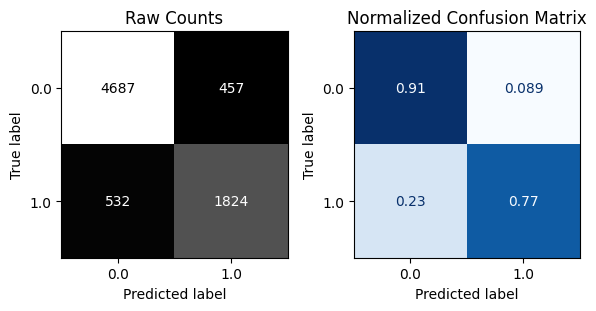


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1723
         1.0       0.72      0.69      0.71       777

    accuracy                           0.82      2500
   macro avg       0.79      0.79      0.79      2500
weighted avg       0.82      0.82      0.82      2500



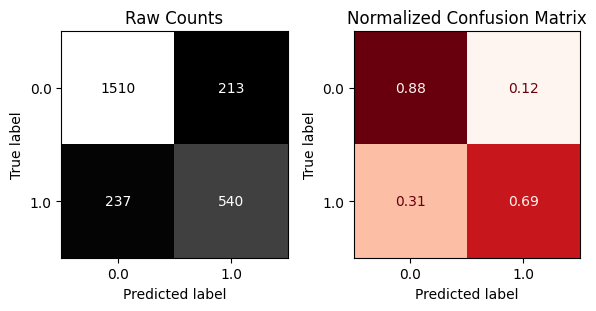

In [ ]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

## Top 10 features

In [ ]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(knn_pipe, X_test, y_test,n_repeats =5, random_state = 42)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [ ]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

,permutation importance
VEHICLE_OWNERSHIP,0.05432
DRIVING_EXPERIENCE,0.04712
VEHICLE_YEAR,0.03360
GENDER,0.02136
POSTAL_CODE,0.01504
MARRIED,0.01240
AGE,0.01224
PAST_ACCIDENTS,0.01104
ANNUAL_MILEAGE,0.01072
CREDIT_SCORE,0.00920


In [ ]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

[Text(0.5, 0, 'Permutation Importance')]

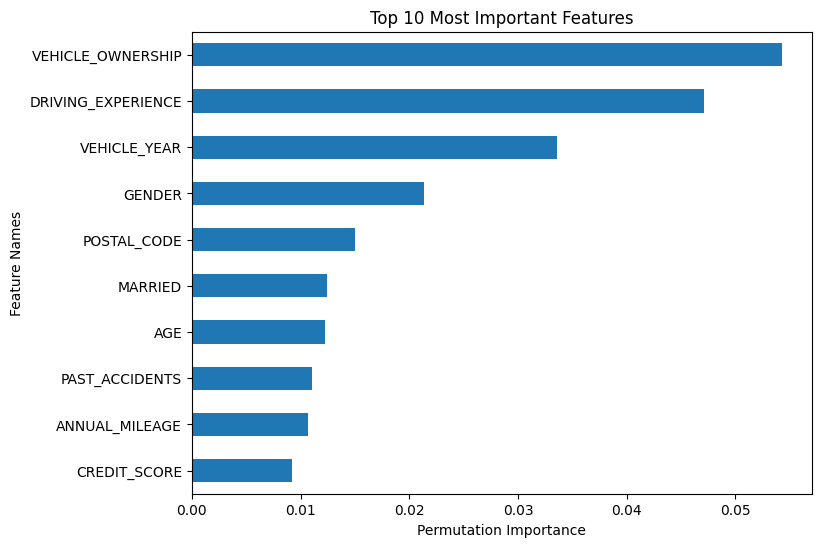

In [ ]:
ax = plot_importance(permutation_importances,top_n=10)
ax.set(xlabel='Permutation Importance')

In [ ]:
## color -coding top 5 bars
highlight_feats = permutation_importances.sort_values(ascending=True).tail(2).index
## create a dictionary of each feature and its color
colors_dict = {}
for col in permutation_importances.index:
    if col in highlight_feats:
        colors_dict[col] = 'green'
    else:
        colors_dict[col] = '#006ba4'

<Axes: >

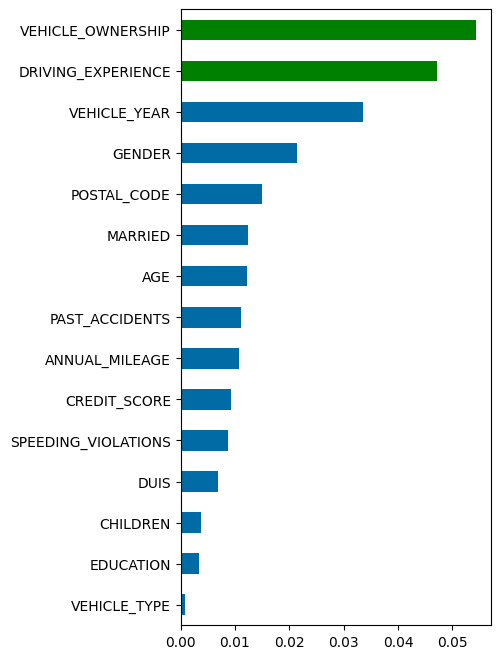

In [ ]:
plot_vals = permutation_importances.sort_values().tail(15)
plot_vals.plot(kind='barh', color=plot_vals.index.map(colors_dict), figsize=(4,8))

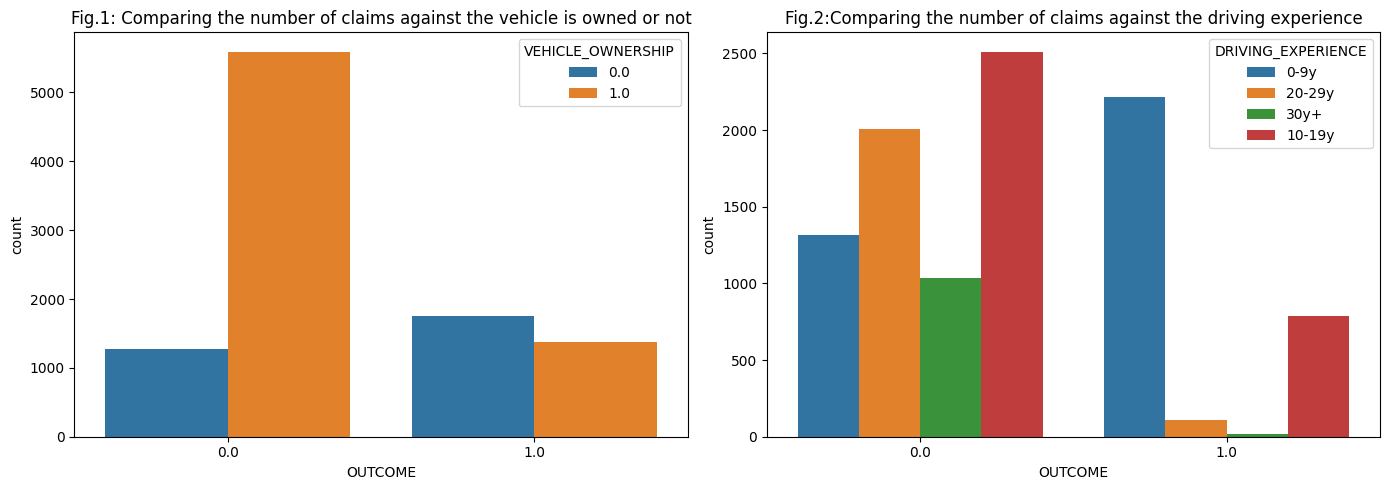

In [ ]:
fig, axes = plt.subplots(ncols=2 , figsize=(14,5))

# # The distribution of CREDIT SCORE values
sns.countplot(data=df, x='OUTCOME',hue='VEHICLE_OWNERSHIP',ax=axes[0])
axes[0].set_title('Fig.1: Comparing the number of claims against the vehicle is owned or not', fontsize = 12)

# # The distribution of ANNUAL MILEAGE values
sns.countplot(data=df,  x='OUTCOME',hue='DRIVING_EXPERIENCE',ax=axes[1])
axes[1].set_title('Fig.2:Comparing the number of claims against the driving experience', fontsize = 12)

fig.tight_layout()

**Fig.1:Vehicle Ownership**


* People who own their vehicles file significantly fewer insurance claims compared to those who do not own their vehicles.

* This could suggest that vehicle owners may be more cautious or responsible with the vehicles they own.



**Fig.2:Driving Experience**


* Drivers with 0–9 years of experience have the highest number of claims, followed by those with 10–19 years.

* Those with 30+ years of driving experience file the fewest claims, indicating a strong negative correlation between experience and claim likelihood.



## Apply PCA

In [ ]:
# Instantiate PCA to make 3 principal components
pca = PCA(n_components=3)
# Create and define the principal components
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

In [ ]:
X_train_new = pd.concat([X_train, X_train_pca], axis=1)
X_test_new = pd.concat([X_test, X_test_pca], axis=1)
X_train_new.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,pca0,pca1,pca2
ID,,,,,,,,,,,,,,,,,,,,
597605,40-64,male,majority,0-9y,high school,upper class,0.694461,1.0,before 2015,1.0,1.0,92101,NaN,sedan,0,0,0,0.637617,1.767520,-1.920424
208394,16-25,female,majority,0-9y,none,poverty,0.295794,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,0,0,0,-3.466746,-0.699245,-0.219572
318837,40-64,male,majority,10-19y,university,upper class,NaN,1.0,before 2015,1.0,1.0,10238,NaN,sedan,0,0,3,1.316235,0.909168,0.023911
559214,26-39,female,majority,10-19y,university,working class,0.454836,1.0,before 2015,0.0,0.0,10238,20000.0,sedan,2,0,0,-1.849513,0.743817,2.878994
555274,16-25,female,majority,0-9y,none,poverty,0.152972,1.0,before 2015,1.0,0.0,10238,10000.0,sedan,0,0,0,-3.140347,-1.045267,-1.209794


## Clustering

In [ ]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
kmeans.fit(X_train_processed)

KMeans(n_clusters=2, random_state=42)

Text(0, 0.5, 'inertia')

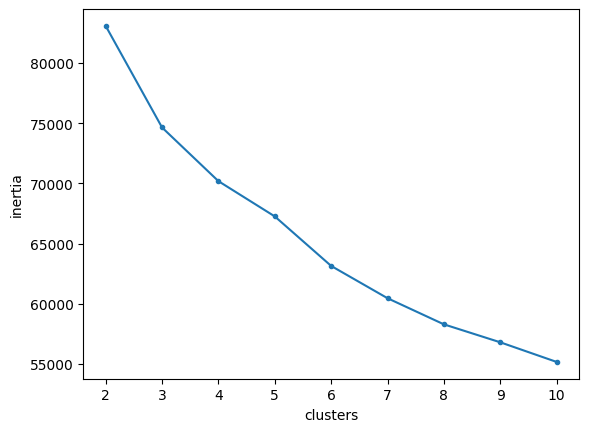

In [ ]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state = 42)
    kmeans.fit(X_train_processed)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

Text(0, 0.5, 'Silhouette Score')

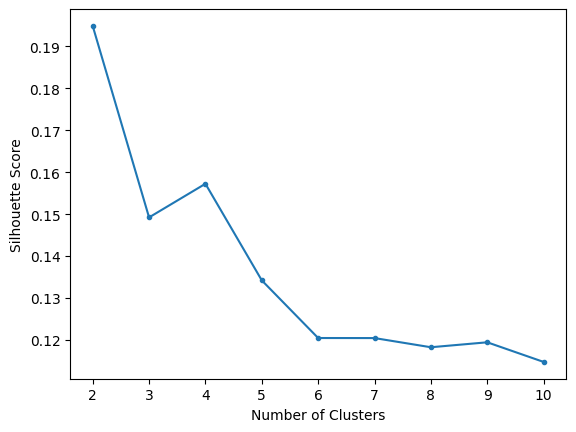

In [ ]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, n_init = 10, random_state = 42)
  kmeans.fit(X_train_processed)
  silhouette_scores.append(silhouette_score(X_train_processed, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

In [ ]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
kmeans.fit(X_train_processed)

KMeans(n_clusters=2, random_state=42)

In [ ]:
X_train['cluster'] = kmeans.labels_
X_train.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,cluster
ID,,,,,,,,,,,,,,,,,,
597605,40-64,male,majority,0-9y,high school,upper class,0.694461,1.0,before 2015,1.0,1.0,92101,NaN,sedan,0,0,0,1
208394,16-25,female,majority,0-9y,none,poverty,0.295794,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,0,0,0,0
318837,40-64,male,majority,10-19y,university,upper class,NaN,1.0,before 2015,1.0,1.0,10238,NaN,sedan,0,0,3,1
559214,26-39,female,majority,10-19y,university,working class,0.454836,1.0,before 2015,0.0,0.0,10238,20000.0,sedan,2,0,0,0
555274,16-25,female,majority,0-9y,none,poverty,0.152972,1.0,before 2015,1.0,0.0,10238,10000.0,sedan,0,0,0,0


## Neural Network

In [ ]:
# define input shape
input_shape = X_train_processed.shape[1]
input_shape

21

In [ ]:
 # Instantiate Model
model = Sequential()

    # First hidden layer
model.add(Dense(21, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?

model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
model.compile(loss = 'bce', optimizer = 'adam',
        metrics=['accuracy', metrics.Precision(), metrics.Recall()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Step 3: Fit our model
history = model.fit(X_train_processed, y_train,validation_split = .2, epochs=50,verbose=0, callbacks = [early_stop])

In [ ]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

(<Figure size 600x1200 with 4 Axes>,
 array([<Axes: title={'center': 'accuracy'}>,
        <Axes: title={'center': 'loss'}>,
        <Axes: title={'center': 'precision'}>,
        <Axes: title={'center': 'recall'}>], dtype=object))

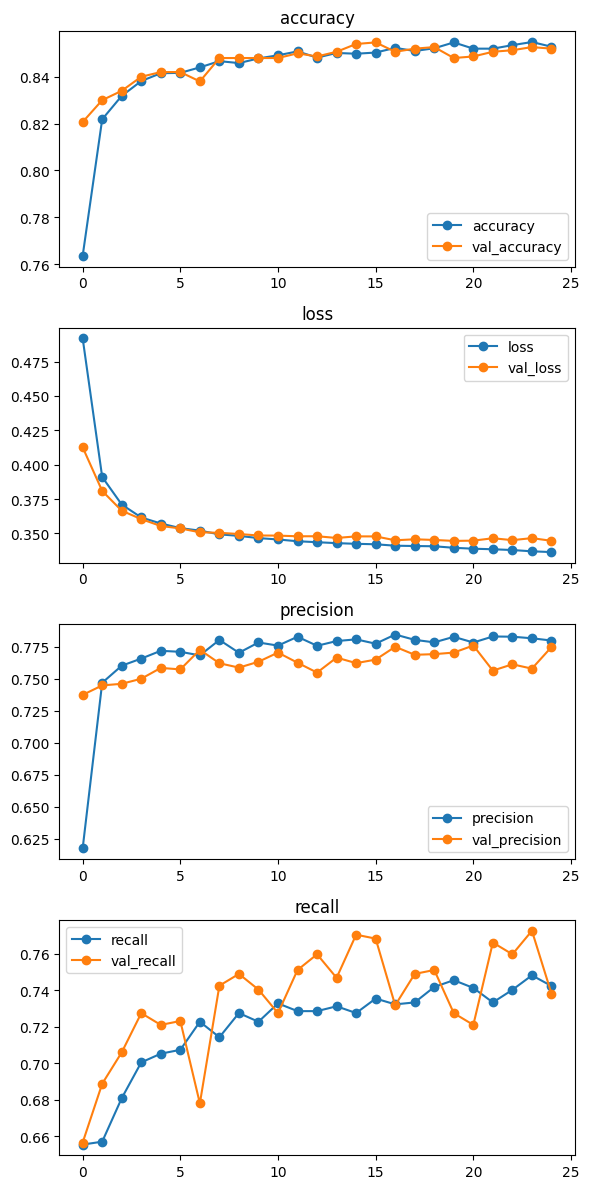

In [ ]:
# plot learning history
plot_history(history)

In [ ]:
# make predictions
y_pred_test = model.predict(X_test_processed)
# round the predictions
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      1723
         1.0       0.76      0.69      0.72       777

    accuracy                           0.84      2500
   macro avg       0.81      0.80      0.80      2500
weighted avg       0.83      0.84      0.83      2500



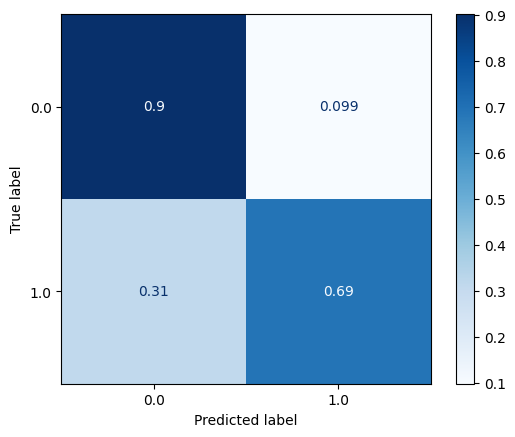

In [ ]:
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true')

In [ ]:
# Build and Compile Model within a function to try different optimizers, units, and dropout values
def build_model(hp):
    # Instantiate Model
    model2 = Sequential()
    # First hidden layer
    model2.add(Dense(21, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    # Try different values for units
    model2.add(Dense(units=hp.Int('units', min_value=10, max_value=50, step=5), activation='relu'))
    # Try different values for dropout rate
    model2.add(Dropout(hp.Float(name="dropout_value", min_value=0.0, max_value=0.5, step=0.1)))
    model2.add(Dense(1, activation = 'sigmoid'))

    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    # Compile Model
    # Try different optimizers
    model2.compile(optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
                  loss='bce',
                  metrics=['accuracy',
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.Precision(name='precision')])
    return model2

In [ ]:
# Make a folder to store results of hyperparameter tuning
import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [ ]:
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='car_tuning')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Run the tuner
epochs = 100
tuner.search(X_train_processed, y_train,  epochs=epochs,
            validation_split = .2, callbacks = [early_stop])

Trial 254 Complete [00h 00m 28s]
val_accuracy: 0.8546666502952576

Best val_accuracy So Far: 0.8600000143051147
Total elapsed time: 01h 05m 55s
